# Hadron dynamics in the Schwinger model
Challenge based on [*Quantum Simulations of Hadron Dynamics in the Schwinger Model using 112 Qubits* - arXiv:2401.08044](https://arxiv.org/abs/2401.08044)

Note: Some of the implementation also refers to [*Scalable Circuits for Preparing Ground States on Digital Quantum Computers:
The Schwinger Model Vacuum on 100 Qubits* - arXiv:2308.04481](https://arxiv.org/pdf/2308.04481), which is referenced below.

*Usage estimate: 4:23 minutes on ibm_kingston (NOTE: This is an estimate only. Your runtime might vary.)*

## Introduction

In this challenge, you will follow the paper above to simulate the propagation (spreading) of a hadron wavepacket in the Schwinger model on an IBM quantum computer. The figure below (Fig. 10 in the paper) illustrates hadron evolution, quantified in terms of the chiral condensate $\mathcal{X}$ (the left side is a simulation, and the right side is based on real hardware).

<img src="./images/summary_ev.png" width="1400"/>

In the paper, the wavepacket is prepared on a lattice with $L=56$ spatial sites ($2L = 112$ total sites and therefore 112 qubits) and then evolved  up to $t=14$. To keep the required resources more modest for this challenge, we adjusted this to a slightly smaller scale: $L = 34$ (68 qubits) and $t = 8$. Also, we will not simulate all intermediate time snapshots, but instead focus on $t=0$ and $t=8$. **In our hardware experiment, we will try to reproduce the wavepacket's spread at $t=8$, and specifically, the dip in the vacuum-subtracted chiral condensate in the center, with a peak on each side (see the simulated result below for a lattice of $L=34$ spatial sites).**

<img src="./images/wave_propagation_t8_sim.png" width="1400"/>



## The Hamiltonian

We start from the Schwinger model and apply the Jordan-Wigner mapping to lattice with $L$ spatial sites ($2L$ staggered sites; Kogut & Susskind).

After mapping to qubits by using the Jordan-Wigner transformation, we get the Hamiltonian shown in equations (1) and (6):
$$
\begin{align}
\hat H & \ =\  \hat H_m + \hat H_{kin} + \hat H_{el} \ = \ \frac{m}{ 2}\sum_{j=0}^{2L-1}\ \left[ (-1)^j \hat Z_j + \hat{I} \right] \ + \ \frac{1}{2}\sum_{j=0}^{2L-2}\ \left( \hat \sigma^+_j \hat\sigma^-_{j+1} + {\rm h.c.} \right) \ + \ \frac{g^2}{ 2}\sum_{j=0}^{2L-2}\bigg (\sum_{k\leq j} \hat Q_k \bigg )^2 
\ ,
\nonumber \\ 
\hat Q_k & \ = \ -\frac{1}{2}\left[ \hat Z_k + (-1)^k\hat{I} \right] \\
\hat{H}_{el}^{(Q=0)}(1) 
\ = \ &\frac{g^2}{2}\Bigg\{ \sum_{n=0}^{\frac{L}{2}-1} \left[ \left( \frac{L}{2} - \frac{3}{4} - n \right)\hat{Z}_{2n}\hat{Z}_{2n+1}+\left (n+\frac{1}{4} \right )\hat{Z}_{L+2n}\hat{Z}_{L+2n+1}\right ] 
\nonumber \\
&+ \ \frac{1}{2}
\sum_{n=1}^{\frac{L}{2}-2} \left (2 \hat{Z}_{2n} + \hat{Z}_{2n+1}-\hat{Z}_{L+2n}-2\hat{Z}_{L+2n+1} \right )
\nonumber \\
&+ \ \frac{1}{2}\left (2\hat{Z}_{0}+\hat{Z}_{1}+\hat{Z}_{L-2}-\hat{Z}_{L+1}-\hat{Z}_{2L-2}-2\hat{Z}_{2L-1} \right )  \nonumber \\
&+ \sum_{n=0}^{\frac{L}{2}-2} \bigg[\left (\frac{L}{2}-\frac{5}{4}-n \right )(\hat{Z}_{2n}+\hat{Z}_{2n+1})\hat{Z}_{2n+2} + \left( \frac{L}{2} - \frac{7}{4} - n \right)(\hat{Z}_{2n}+\hat{Z}_{2n+1})\hat{Z}_{2n+3}
\nonumber \\
&+ \  \left (n+\frac{1}{4} \right )(\hat{Z}_{L+2n+2}+\hat{Z}_{L+2n+3})\hat{Z}_{L+2n} +\left (n+\frac{3}{4} \right )(\hat{Z}_{L+2n+2}+\hat{Z}_{L+2n+3})\hat{Z}_{L+2n+1} \bigg] \Bigg\} 
\ .
\end{align}
$$

### Electrons and positrons on the staggered lattice

On the staggered lattice, the even sites correspond to the electrons and the odd sites correspond to the positrons.

For the (even) electron sites:
* qubit state $|0\rangle$: site occupied
* qubit state $|1\rangle$: site empty

For the (odd) positron sites:
* qubit state $|0\rangle$: site empty
* qubit state $|1\rangle$: site occupied

### Observables

Our observable of interest is the chiral condensate $\hat{\chi}_j = (-1)^j \hat Z_j + \hat{I}$, and our final result will be to plot the vacuum-subtracted chiral condensate $\mathcal{X}_j \equiv \hat{\chi}_j^{\rm wave} - \hat{\chi}_j^{\rm vacuum}$, that is, the difference between the chiral condensate for the evolved wavepacket and the evolved vacuum. This means we will build separate circuits for the wavepacket initial state + evolution, and for the vacuum initial state + evolution.

### Initial states

We will use the variational circuits trained in the paper with SC-ADAPT-VQE (we will not train the circuits ourselves in this notebook) to create the vacuum and initial wavepacket states.

### Evolution

We will use the Suzuki-Trotter algorithm to evolve the initial states forward in time.

### Error mitigation

We will use a suite of error mitigation techniques to optimize our results. Following the paper, this includes operator decoherence renormalization (ODR). This technique requires us, for each circuit of interest (referred to below as "physics circuits") to also run a calibration/mitigation circuit that has similar noise properties, but a known answer for the observables of interest.

### Summary of circuits needed

In summary, for each time snapshot (by default, we will compute the evolution to only a single time here, $t=8$), we will need four circuits:
1. Wavepacket evolution physics circuit
2. Wavepacket evolution calibration/mitigation circuit
3. Vacuum evolution physics circuit
4. Vacuum evolution calibration/mitigation circuit

<div class="alert alert-block alert-success">

# Challenge Instructions: Evolve hadron wave packet



### Your tasks

1. Implement code to evolve a hadron wave packet and extract the wave spreading/propagation signal by following directions and filling in code below. Look for the `# PROMPT` marker inside the code boxes to find the places where code needs to be filled in. Where needed, there are specific `# BEGIN ANSWER` and `# END ANSWER` markers as well. Completing the notebook by filling in the prompts will lead to a basic implementation that has a few simplifications relative to the implementation in the paper.


2. Once step 1 is complete, and time permitting, try to implement one adjustment to the basic code **before running on hardware**. This can lead to two types of outcomes that are both valuable:
* You improve the quality of the result (wave spreading identification)
* The accuracy does not improve but you have now quantified the impact of the modification you tried

### Improvements/modifications to explore
* Treatment of the circuit layout (the mapping to qubits on the device). E.g.:
  * Map to a more optimal set of qubits than achieved in the default implementation in this notebook
  * Investigate real-time benchmarking before mapping the circuit to hardware (see https://quantum.cloud.ibm.com/docs/en/tutorials/real-time-benchmarking-for-qubit-selection)
  * Run each circuit on multiple layouts so that errors due to bad qubits average out
* Implement alternative error mitigation:
  * ZNE
  * [TEM](https://quantum.cloud.ibm.com/docs/en/guides/algorithmiq-tem)
* Quantify the limitations of ODR and the bias induced by it
* Vary Trotter step size
* Add (additional) readout error mitigation in a way that makes sense (note: the ODR implementation already "contains" T-REX readout error mitigation)
* Interleave twirls (i.e. for each twirl, run the physics and mitigation circuits back to back using the same twirl realization) and apply post-selection at the twirl-level (as in the paper)
* Investigate improvements (if any) from implementing fractional gates
* Modify the truncation of the electric interaction in the Hamiltonian
* Modify the boundary conditions from open to periodic
* **Pursue your own idea**

### Tips
* As you build the circuits in Step 1, even though there are no prompts for this, we highly recommend regularly using the QuantumCircuit's draw function to visualize the circuits you are building.

## Grading system (90 points):
### Ex.1: Defining the chiral condensate observables (5 points)
### Ex.2: Creating the vacuum circuit (10 points) 
### Ex.3: Creating the wavepacket preparation circuit (10 points)
### Ex.4: Creating circuits for the time-evolved wavepacket and vacuum (15 points)
### Ex.5: Defining the backend (5 points) 
### Ex.6: Defining the Estimator (5 points)
### Ex.7: Creating the list of PUBs (5 points)
### Ex.8: Submitting and getting your job executed (5 points)
### Ex.9: Unpacking the results by creating different arrays (5 points)
### Ex.10: Mitigating the errors (5 points)
### Ex.11: Minimizing the error of the chiral wave packets (up to 20 points)

</div> 


## Python imports

We assume that we start from a Python environment that has been initialized by following the instructions.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('lines', linewidth=3)
plt.rc('font', size=20)
plt.rc('legend', fontsize = 'large')
plt.rc('axes', labelsize=20)
plt.rcParams['figure.figsize'] = 15, 6
plt.rcParams['legend.title_fontsize'] = 25

from qiskit.circuit.gate import Gate
# helper functions specific to this challenge (module located in the same folder as the notebook)
import challenge_utils

Import the grader functions and submit the team name to which your points should be assigned:

In [2]:
from grader_ch3 import (challenge3, grader_ch3_ex1, grader_ch3_ex2, grader_ch3_ex3, grader_ch3_ex4, grader_ch3_ex5, grader_ch3_ex6,
                        grader_ch3_ex7, grader_ch3_ex8, grader_ch3_ex9, grader_ch3_ex10, grader_ch3_ex11)
# PROMPT: Define your team name
YOUR_TEAM_NAME = "r2p_converters"
challenge3.submit_name(YOUR_TEAM_NAME)

Grading your answer. Please wait...
Team name submitted.


Run the cell below to create a folder to store your results:

In [3]:
import os

folder_name = "submitted-results"
os.makedirs(folder_name, exist_ok=True)

### Define the model [no prompts]

In [4]:
# DO NOT MODIFY (the variational circuit parameters used in the rest of this challenge are specific to these model parameters)
m = 0.5 # electron/positron mass
g = 0.3 # coupling

$L$ is the number of *spatial* lattice sites. In the paper, results are shown for L=56. To keep the required resources more modest in the challenge, we will consider a slightly smaller lattice here with L = 34.

> **Note:** The electrons and positrons are staggered on these spatial sites leading to a total of 2 x L sites/qubits. 

In [5]:
L = 34 # number of spatial lattice sites, to be captured by 2 x L qubits

<span id="step1"></span>
## Step 1: Map problem to quantum circuits
<div class="alert alert-block alert-success">

In this section you will define the observables and then build the circuits to simulate wavepacket evolution in the Schwinger model, as well as the circuits needed for vacuum subtraction and error mitigation.

As explained in the introduction, in total we will construct four circuits (in general, 4 x $n_T$ circuits for $n_T$ time snapshots).

The workflow for the wavepacket evolution physics circuit is as follows:
1. Create a simple initial state to serve as the starting point for the variational circuit layers.
2. Apply two pre-trained variational unitaries to construct the vacuum state from the simple initial state.
3. Apply two pre-trained variational unitaries to construct the wavepacket state from the vacuum state.
4. Apply Trotterized time evolution to evolve the wavepacket forward in time.

The other circuits are constructed in parallel.

</div>

### 1a: Define the observables

Remember that we want to measure the chiral condensate $\hat{\chi}_j = (-1)^j \hat Z_j + \hat{I}$. We want `observables` to be a list containing the chiral condensate observable for each site. Each observable in the list will be of type SparsePauliOp and the list should contain 2L elements. *Hint: the observable at each site will be a weighted sum of two Pauli strings.*

In [7]:
from qiskit.quantum_info import SparsePauliOp
# PROMPT: Create a list containing the chiral condensate observable for each site.

# observables count: 2 * 34 = 68
observables_length = 2 * L
observables = []
for j in range(observables_length):
    Z_coeff = 1.0 if j % 2 == 0 else -1.0
    I_coeff = 1.0

    Z = ['I'] * observables_length
    Z[j] = 'Z'
    Z_string = ''.join(reversed(Z))

    I = ['I'] * observables_length
    I_string = ''.join(reversed(I))

    observable = SparsePauliOp([Z_string, I_string], [Z_coeff, I_coeff])
    observables.append(observable)

print(f"length of observables: {len(observables)}")
for observable in observables[:10]:
    print(observable)

length of observables: 68
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[-1.+0.j,  1.+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[-1.+0.j,  1.+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              

In [8]:
# grade your answer:
grader_ch3_ex1(observables)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 5.0.


### 1b: Create a vacuum preparation circuit

We will start from the strong-coupling vacuum (every fermion site unoccupied).

Note that when using the staggered Jordan-Wigner mapping, the even sites correspond to the electrons and the odd sites to the positrons and...

For the electron sites:
* qubit state $|0\rangle$: site occupied
* qubit state $|1\rangle$: site empty

For the positron sites:
* qubit state $|0\rangle$: site empty
* qubit state $|1\rangle$: site occupied

In [12]:
from qiskit import QuantumCircuit

# PROMPT: Complete the function so that the output circuit qc prepares the strong-coupling vacuum where all sites are empty.
def prep_strong_coupling_vacuum(L: int) -> QuantumCircuit:
    """
    Prepares the strong-coupling vacuum state for a model with L spatial sites, where all sites are empty of electrons and positrons.

    Args:
        L: number of spatial sites
    
    Returns:
        QuantumCircuit that prepares the strong-coupling vacuum
    """

    qc = QuantumCircuit(2 * L)
    
    # BEGIN ANSWER
    for qubit in range(2 * L):
        if qubit % 2 == 0:
            qc.x(qubit)
    
    # END ANSWER
    
    return qc

We now prepare (pre-trained) variational circuits to go from the strong-coupling vacuum to the vacuum for our model with $m = 0.5$ and $g = 0.3$

Specifically, we apply unitaries, $e^{i \theta_n \hat{O}_n}$, generated by the vacuum pool operators (see Eq. (7) in the paper). For the 2-step SC-ADAPT-VQE vacuuum, we will just need $\hat{O}_{mh}^V(1)$ and $\hat{O}_{mh}^V(3)$, with coefficients given in Table II in the paper.

$$
\begin{align}
 \hat O_{mh}^{V}(1) &
 = 
\frac{1}{2}\sum_{n=0}^{2L-2}(-1)^n\left (
\hat X_n \hat Y_{n+1} - 
\hat Y_n \hat X_{n+1} 
\right )
\end{align}
$$

$$
\begin{align}
 \hat O_{mh}^{V}(3) &
 = 
\frac{1}{2}\sum_{n=0}^{2L-4}(-1)^n\left (
\hat X_n \hat Z_{n+1} \hat Z_{n+2} \hat Y_{n+3} - 
\hat Y_n \hat Z_{n+1} \hat Z_{n+2} \hat X_{n+3} 
\right )
\end{align}
$$

These operations can be implemented by using basic building blocks $R^{(XY)}_{\pm}(\theta)$ acting on two qubits as shown below (Fig. 5 in paper; note that in arXiv:2308.04481, these are referred to simply as $R_{\pm}(\theta)$, see Fig. 3a). 

Let's first implement these building blocks as gates.


<img src="./images/xy_circ.png" width="800"/>



In [20]:
# PROMPT: Complete the functions below so that they output a gate implementing R^{(XY)}_{\pm}(\theta) on two qubits.
# NOTE: Do not add barriers to the qc because this will throw an error when converting the circuit to a gate object.

def RXYplus(theta: float) -> Gate:
    """
    Constructs a gate implementing YX+XY rotation as visualized above

    Args:
        theta: rotation angle
    
    Returns:
        Gate implementing the unitary
    """

    # BEGIN ANSWER
    qc = QuantumCircuit(2)
    qc.id(0)
    qc.s(0)
    qc.h(0)

    qc.z(1)
    qc.h(1)
    qc.s(1)

    qc.cx(0, 1)

    qc.ry(theta, 0)
    qc.rz(theta, 1)

    qc.cx(0, 1)

    qc.h(0)
    qc.sdg(0)

    qc.sdg(1)
    qc.h(1)
    qc.z(1)
    # display(qc.draw('mpl'))
    # END ANSWER

    gate = qc.to_gate(label=fr'$R^{{XY}}_{{+}}({theta})$')
    return gate

def RXYminus(theta: float) -> Gate:
    """
    Constructs a gate implementing YX-XY rotation as visualized above

    Args:
        theta: rotation angle
    
    Returns:
        Gate implementing the unitary
    """

    # BEGIN ANSWER
    qc = QuantumCircuit(2)
    qc.id(0)
    qc.s(0)
    qc.h(0)

    qc.z(1)
    qc.h(1)
    qc.s(1)

    qc.cx(0, 1)

    qc.ry(-theta, 0)
    qc.rz(theta, 1)

    qc.cx(0, 1)

    qc.h(0)
    qc.sdg(0)

    qc.sdg(1)
    qc.h(1)
    qc.z(1)
    # display(qc.draw('mpl'))
    # END ANSWER

    gate = qc.to_gate(label=fr'$R^{{XY}}_{{-}}({theta})$')
    return gate

Now we create the rotations $e^{i \theta \hat{O}}$ generated by $\hat{O}^V_{mh}(1)$ and $\hat{O}^V_{mh}(3)$, and with `prep_vacuum` we construct the full circuit that instantiates the true vacuum by adding these layers (with pre-trained angles) to the circuit, creating the strong-coupling vacuum. The implementations are shown in figures (a) and (b), below, from Figure 4 in arXiv:2308.04481,  where $R_{\pm}(\theta)$ are the $R^{XY}_{\pm}(\theta)$ building blocks that we have already implemented. We will ignore (c) in this challenge.



<img src="./images/Oh135sim.png" width="1200"/>


In [52]:
from cmath import pi


def vacuum_prep_rotate_OV_1(qc: QuantumCircuit, theta: float, L: int) -> QuantumCircuit:
    """
    Adds unitary generated by O^V_{mh}(1) to circuit qc (see Fig. 4a of arXiv:2308.04481)

    Args:
        qc: input circuit
        theta: rotation angle
        L: number of spatial sites
    
    Returns:
        Circuit with the unitary added
    """

    for n in range(L):
        qc.append(RXYminus(theta), [2*n, 2*n+1])
    for n in range(L-1):
        qc.append(RXYminus(-theta), [2*n+1, 2*n+2])

    return qc

# PROMPT: Fill in the function below, which takes a circuit "qc" and adds \hat{O)}^V_{mh}(3)
def vacuum_prep_rotate_OV_3(qc: QuantumCircuit, theta: float, L: int) -> QuantumCircuit:
    """
    Adds unitary generated by O^V_{mh}(3) to circuit qc (see Fig. 4b of arXiv:2308.04481)

    Args:
        qc: input circuit
        theta: rotation angle
        L: number of spatial sites
    
    Returns:
        Circuit with the unitary added
    """

    # BEGIN ANSWER
    ID = QuantumCircuit(2)
    ID.id(0)
    ID.id(1)

    for n in range(L):
        qc.append(RXYplus(-pi/2), [2*n, 2*n+1])
    for n in range(L-1):
        qc.append(RXYminus(-theta), [2*n+1, 2*n+2])
    for n in range(L):
        qc.append(RXYplus(pi/2), [2*n, 2*n+1])
    for n in range(L-1):
        qc.append(RXYplus(-pi/2), [2*n+1, 2*n+2])
    for n in range(L):
        if n == 0 or n == L-1:
            qc.append(ID, [2*n, 2*n+1])
        else:
            qc.append(RXYminus(theta), [2*n, 2*n+1])
    for n in range(L-1):
        qc.append(RXYplus(pi/2), [2*n+1, 2*n+2])
        
    # END ANSWER

    return qc

def prep_vacuum(L: int, vacuum_prep_theta_OV_1: float, vacuum_prep_theta_OV_3: float) -> QuantumCircuit:
    """
    Creates circuit that prepares the vacuum state on L spatial sites

    Args:
        L: number of spatial sites
        vacuum_prep_theta_OV_1: rotation angle for vacuum-prep transformation generated by O^V_{mh}(1)
        vacuum_prep_theta_OV_3: rotation angle for vacuum-prep transformation generated O^V_{mh}(3)
    
    Returns:
        QuantumCircuit that prepares the vacuum state
    """

    # Start from the strong-coupling vacuum
    qc = prep_strong_coupling_vacuum(L)

    # PROMPT: Apply the two rotations generating the vacuum state
    # BEGIN ANSWER
    qc = vacuum_prep_rotate_OV_1(qc, vacuum_prep_theta_OV_1, L)
    qc = vacuum_prep_rotate_OV_3(qc, vacuum_prep_theta_OV_3, L)
    # END ANSWER

    return qc

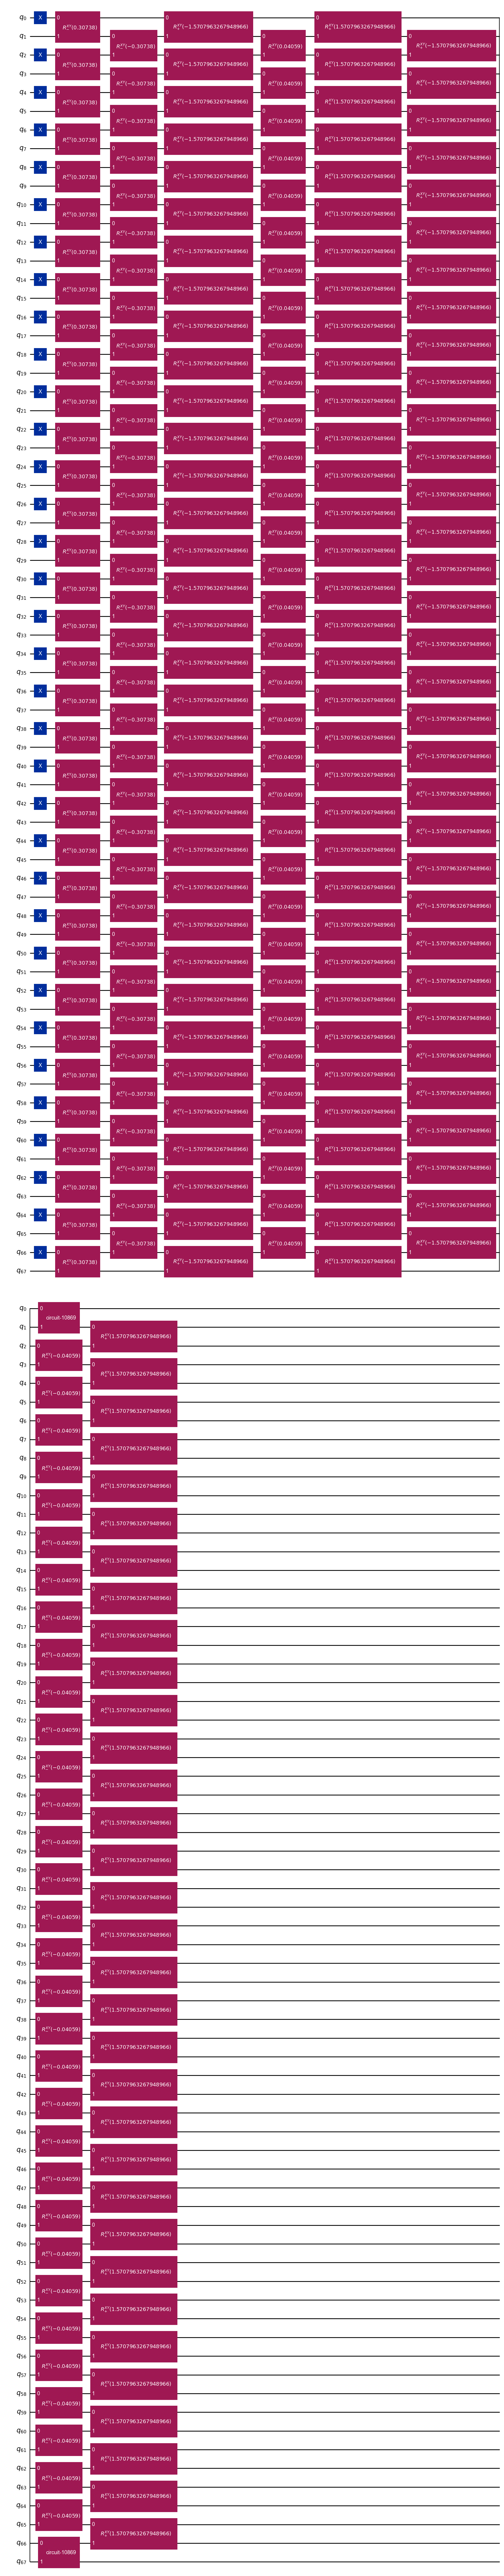

In [53]:
# code cell for circuit visualization
vacuum_prep_theta_OV_1 = 0.30738
vacuum_prep_theta_OV_3 = -0.04059
circuit = prep_vacuum(L, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3)
display(circuit.draw('mpl'))

We now construct the circuit `qc_vacuum_init`, which prepares the vacuum state.

In [54]:
# The pre-trained variational parameters from the paper:
vacuum_prep_theta_OV_1 = 0.30738
vacuum_prep_theta_OV_3 = -0.04059

qc_vacuum_init = prep_vacuum(L, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3)

In [55]:
# Grade your circuit-generating function (the grader tests a smaller-scale version of the qc_vacuum_init circuit):
grader_ch3_ex2(prep_vacuum(8, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3))

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 10.0.


### 1c: Create the wavepacket preparation circuit

We now work toward a function `wave_prep` that builds a circuit that prepares the wavepacket state. It will first generate the vacuum (as above) and then apply unitaries $e^{i \theta \hat{O}}$ generated by **wavepacket preparation** pool operators (see Eq (12) in the paper).

For 2-step wavepacket preparation, we will just need $\hat{O}_{mh}(1,1)$ and $\hat{O}_{mh}(2,2)$ with coefficients given by Table II.

$$
\begin{align}
    \hat{O}_{mh}(1,1) &=\frac{1}{2} \left[ 
    \hat{X}_{L-1}  \hat{Y}_{L} 
    - \hat{Y}_{L-1} \hat{X}_{L}  \right]
\end{align}
$$

$$
\begin{align}
    \hat{O}_{mh}(2,2) &=\frac{1}{2} \left[ 
    \hat{X}_{L-2} \hat{Z}_{L-1}  \hat{Y}_{L} 
    - \hat{Y}_{L-2} \hat{Z}_{L-1} \hat{X}_{L}  
    \ - \  \left (\hat{X}_{L-1} \hat{Z}_{L}  \hat{Y}_{L+1} - \hat{Y}_{L-1}  \hat{Z}_{L} \hat{X}_{L+1} \right ) \right] 
\end{align}
$$

The rotations $e^{i \theta \hat{O}}$ generated by the above operators can again be implemented in terms of the building blocks $R^{(XY)}_{\pm}(\theta)$. Let's create the circuit that creates the intial wavepacket state, following Fig 6 from the paper (copied below). We will fix the position of the wavepacket to be at the center of the lattice.

<img src="./images/2step_WP_ADAPT.png" width="1200"/>


In [56]:
def wave_prep_rotate_O_11(qc: QuantumCircuit, theta: float, L: int) -> QuantumCircuit:
    """
    Adds a unitary generated by O^{mh}(1,1) to circuit qc (see Figure 6, top left), applied to qubits L-1, L.

    Args:
        qc: input circuit
        theta: rotation angle
        L: number of spatial sites
    
    Returns:
        Circuit with the unitary added
    """

    qc.append(RXYminus(theta), [L-1, L])

    return qc

# PROMPT: Complete the function below that takes a circuit qc as input and returns the circuit with the unitary generated by \hat{O}_{mh}(2, 2) added
# It will apply to the four central qubits of the lattice
def wave_prep_rotate_O_22(qc: QuantumCircuit, theta: float, L: int) -> QuantumCircuit:
    """
    Adds a unitary generated by O^{mh}(2,2) to circuit qc (see Figure 6, bottom left), applied to qubits L-2, L-1, L, L+1

    Args:
        qc: input circuit
        theta: rotation angle
        L: number of spatial sites
    
    Returns:
        Circuit with the unitary added
    """

    # BEGIN ANSWER
    qc.append(RXYplus(-pi/2), [L-1, L])
    qc.append(RXYplus(-theta), [L-2, L-1])
    qc.append(RXYplus(-theta), [L, L+1])
    qc.append(RXYplus(pi/2), [L-1, L])
    # END ANSWER

    return qc

def prep_wave(L: int, vacuum_prep_theta_OV_1: float, vacuum_prep_theta_OV_3: float, wave_prep_theta_O_11: float, wave_prep_theta_O_22: float) -> QuantumCircuit:
    """
    Creates a circuit that prepares the initial wavepacket state on L spatial sites

    Args:
        L: number of spatial sites
        vacuum_prep_theta_OV_1: rotation angle for the vacuum-prep transformation generated by O^V_{mh}(1)
        vacuum_prep_theta_OV_3: rotation angle for the vacuum-prep transformation generated O^V_{mh}(3)
        wave_prep_theta_O_11: rotation angle for the vacuum-prep transformation generated by O_{mh}(1,1)
        wave_prep_theta_O_22: rotation angle for the vacuum-prep transformation generated O_{mh}(2,2)
    
    Returns:
        QuantumCircuit that prepares the initial wavepacket state
    """

    # Start from the circuit that is creating the vacuum
    qc = prep_vacuum(L, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3)

    # PROMPT: Apply the two rotations that generate the wavepacket state from the vacuum state to the circuit
    # BEGIN ANSWER
    qc = wave_prep_rotate_O_11(qc, wave_prep_theta_O_11, L)
    qc = wave_prep_rotate_O_22(qc, wave_prep_theta_O_22, L)
    # END ANSWER

    return qc

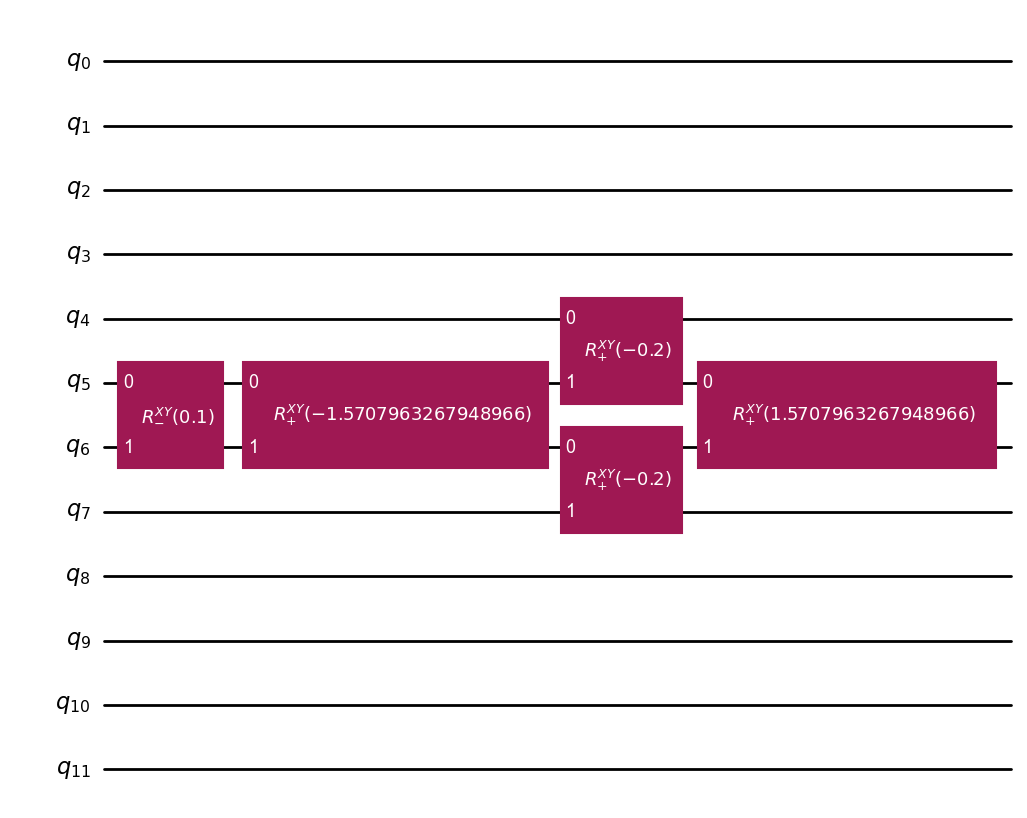

In [57]:
# code cell for circuit visualization
test_L = 6
circuit = QuantumCircuit(2 * test_L)
circuit = wave_prep_rotate_O_11(circuit, 0.1, test_L)
circuit = wave_prep_rotate_O_22(circuit, 0.2, test_L)
display(circuit.draw('mpl'))

We now construct the circuit `qc_wave_init`, which prepares the initial wavepacket state.

In [58]:
# The pre-trained variational parameters from the paper:
wave_prep_theta_O_11 = -1.6492
wave_prep_theta_O_22 = -0.3281

qc_wave_init = prep_wave(L, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3, wave_prep_theta_O_11, wave_prep_theta_O_22)

In [59]:
# Grade your circuit-generating function (the grader tests a smaller-scale version of the qc_wave_init circuit):
grader_ch3_ex3(prep_wave(8, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3, wave_prep_theta_O_11, wave_prep_theta_O_22))

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 10.0.


In the end, we will calculate the **difference** in $\chi$ **between the evolved wavepacket and the evolved vacuum**, $\mathcal{X}_j \equiv \hat{\chi}^{\rm wave}_j - \hat{\chi}^{\rm vacuum}_j$. In addition to being physically meaningful, this can be seen as a form of error mitigation, errors due to hardware noise incurred in both the wavepacket and vacuum evolution might cancel out. For this reason, we want the noise properties, and therefore the structure of the vacuum circuit, to be as close as possible to that of the wavepacket circuit.

Therefore we want to apply the wave preparation layers to the vacuum circuit as well but with angles set to zero (so that in the absence of noise, this is just the identity operation). 

> **Note:** To prevent the transpiler from cancelling these operations later on, we actually set the angles to a very small, but non-zero angle. Let us know if you implement a more elegant solution!.

In [60]:
# apply the wavepacket prep circuit with theta \approx 0 to the vacuum
qc_vacuum_init = wave_prep_rotate_O_11(qc_vacuum_init, 0.9e-4, L)
qc_vacuum_init = wave_prep_rotate_O_22(qc_vacuum_init, 0.9e-4, L)

### 1d: Validation: Classically simulate the initial wavepacket and vacuum states using *Qiskit Aer* - [no prompts]
We will need the exact initial chiral condensate for both the wavepacket and vacuum later for error mitigation. It is also useful visualize what we expect to see at $t=0$ from our later hardware runs.

In [61]:
from qiskit_aer.primitives import EstimatorV2 as AerEstimatorV2

estimator = AerEstimatorV2(options={"backend_options": {"method": "matrix_product_state"}})
sim_results = estimator.run([(qc_wave_init.decompose(), observables), (qc_vacuum_init.decompose(), observables)]).result()
chi_wave_exact = sim_results[0].data.evs
chi_vacuum_exact = sim_results[1].data.evs

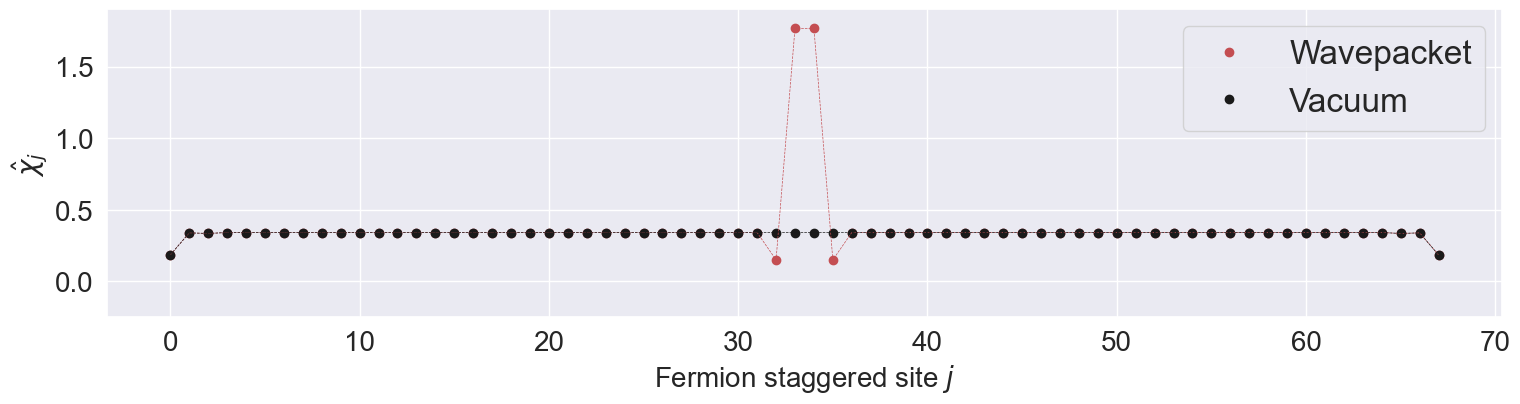

In [62]:
# Load the pre-computed t=0 solutions and compare with the result from your simulated circuit. They should match.
chi_wave_exact_solution = np.loadtxt('chi_wave_t0_sim_L34.txt')
chi_vacuum_exact_solution = np.loadtxt('chi_vacuum_t0_sim_L34.txt')

fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(range(2*L), chi_wave_exact, "ro", linewidth=1, label='Wavepacket')
ax.plot(range(2*L), chi_vacuum_exact, "ko", linewidth=1, label='Vacuum')

ax.plot(range(2*L), chi_wave_exact_solution, "r--", linewidth=0.5)
ax.plot(range(2*L), chi_vacuum_exact_solution, "k--", linewidth=0.5)

ax.set_ylim(bottom=-0.25, top=1.9)#, top=1.5)
ax.set_ylabel(r'$\hat{\chi}_j$')
ax.set_xlabel(r'Fermion staggered site $j$');
ax.legend();

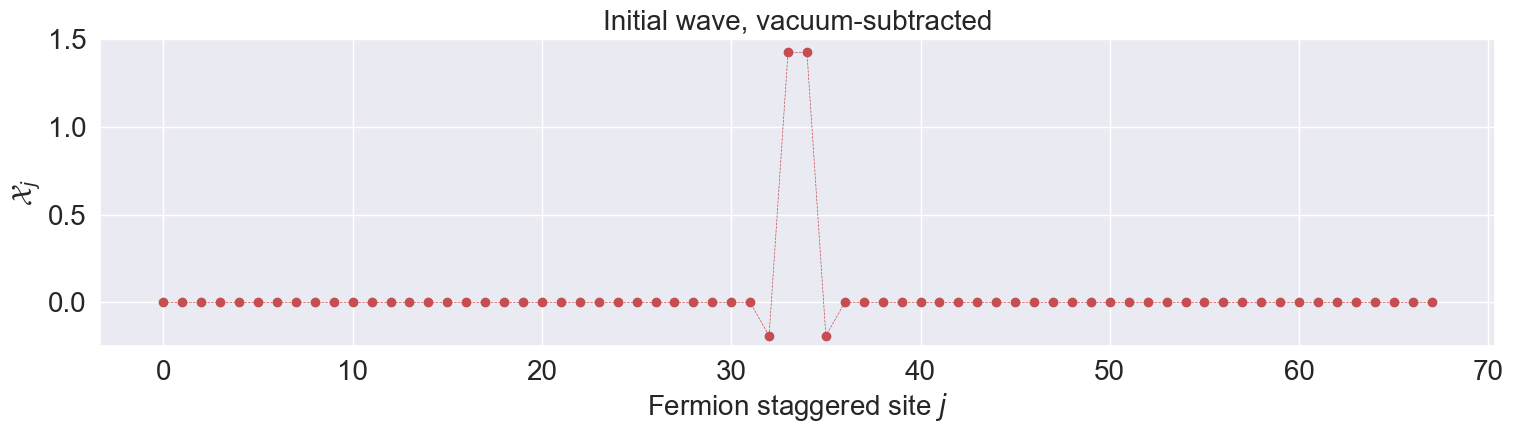

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(range(2*L), chi_wave_exact - chi_vacuum_exact, "ro", linewidth=1)

ax.plot(range(2*L), chi_wave_exact_solution - chi_vacuum_exact_solution, "r--", linewidth=0.5)

ax.set_ylim(bottom=-0.25)
ax.set_ylabel(r'$\mathcal{X}_j$')
ax.set_title('Initial wave, vacuum-subtracted', fontsize=20)
ax.set_xlabel(r'Fermion staggered site $j$');

<span id="1e"></span>
### 1e: Create circuits for the time-evolved wavepacket and vacuum
We will use the second-order Suzuki-Trotter algorithm. The circuit implementation of a full Trotter step is shown below (Fig. 8 of the paper):

<img src="./images/2ndTrott_circuits.png" width="1200"/>


To implement the contribution to the evolution operator from the kinetic term in the Hamiltonian, we need one more basic building block, $R^{(XX)}_{+}(\theta)$ (see Fig. 5, right side), which we will implement as a function returning a gate object. We will simply import this function from the `challenge_utils`.

<img src="./images/xx_circ.png" width="800"/>


In [64]:
from challenge_utils import RXXplus

The Trotter step due to the ZZ contributions to the electric interaction (the 4-qubit "barbell" blocks in the above image) was given to us in the paper's Appendix D and we will load it from `challenge_utils`. Note that this function does not include the single-qubit $R_Z$ rotations from the electric part of the Hamiltonian, shown in the image of the Trotter step circuit above. This is one of the items you need to implement in the `trotter_step` function below.

In [65]:
from challenge_utils import trotter_step_electric_2q

Build a full Trotter step over time interval `time_step` by using the building blocks `RXXplus` and `trotter_step_electric_2q`.

In [73]:
# PROMPT: Implement a full second-order Trotter step as shown in the Figure at the top of this section (1e) (Fig. 8 in the paper)
# We helped a little and already filled in the contribution from the electric part of the Hamiltonian
def trotter_step(qc: QuantumCircuit, L: int, time_step: float, m: float, g: float) -> QuantumCircuit:
    """
    Adds a single Trotter step to input circuit

    Args:
        qc: input circuit
        L: number of spatial sites
        time_step: evolution time for the Trotter step
        m: mass
        g: coupling constant
    
    Returns:
        Circuit with the Trotter step added
    """

    # BEGIN ANSWER

    # Implement H_kin over t/2
    for n in range(L-1):
        qc.append(RXXplus(time_step/4), [2*n+1, 2*n+2])
    for n in range(L):
        qc.append(RXXplus(time_step/4), [2*n, 2*n+1])

    # Implement H_el over t [ALREADY FILLED IN; NO NEED TO ADD CODE TO THIS PART]
    for n in range(L//2 - 1):
        qc.rz(g**2 * time_step, 2 * n)
        qc.rz(0.5 * g**2 * time_step, 2 * n + 1)
    qc.rz(0.5 * g**2 * time_step, L-2)
    qc.rz(-0.5 * g**2 * time_step, L+1)
    for n in range(1, L//2):
        qc.rz(-0.5 * g**2 * time_step, L + 2 * n)
        qc.rz(-g**2 * time_step, L + 2 * n + 1)
    qc = trotter_step_electric_2q(qc, L, time_step, g)

    # Implement H_m over t
    for n in range(2 * L):
        if n % 2 == 0:
            qc.rz(m * time_step, n)
        else:
            qc.rz(-m * time_step, n)

    # Finally, implement H_kin over t/2 (note the reversed order)
    for n in range(L):
        qc.append(RXXplus(time_step/4), [2*n, 2*n+1])
    for n in range(L-1):
        qc.append(RXXplus(time_step/4), [2*n+1, 2*n+2])

    # END ANSWER

    return qc

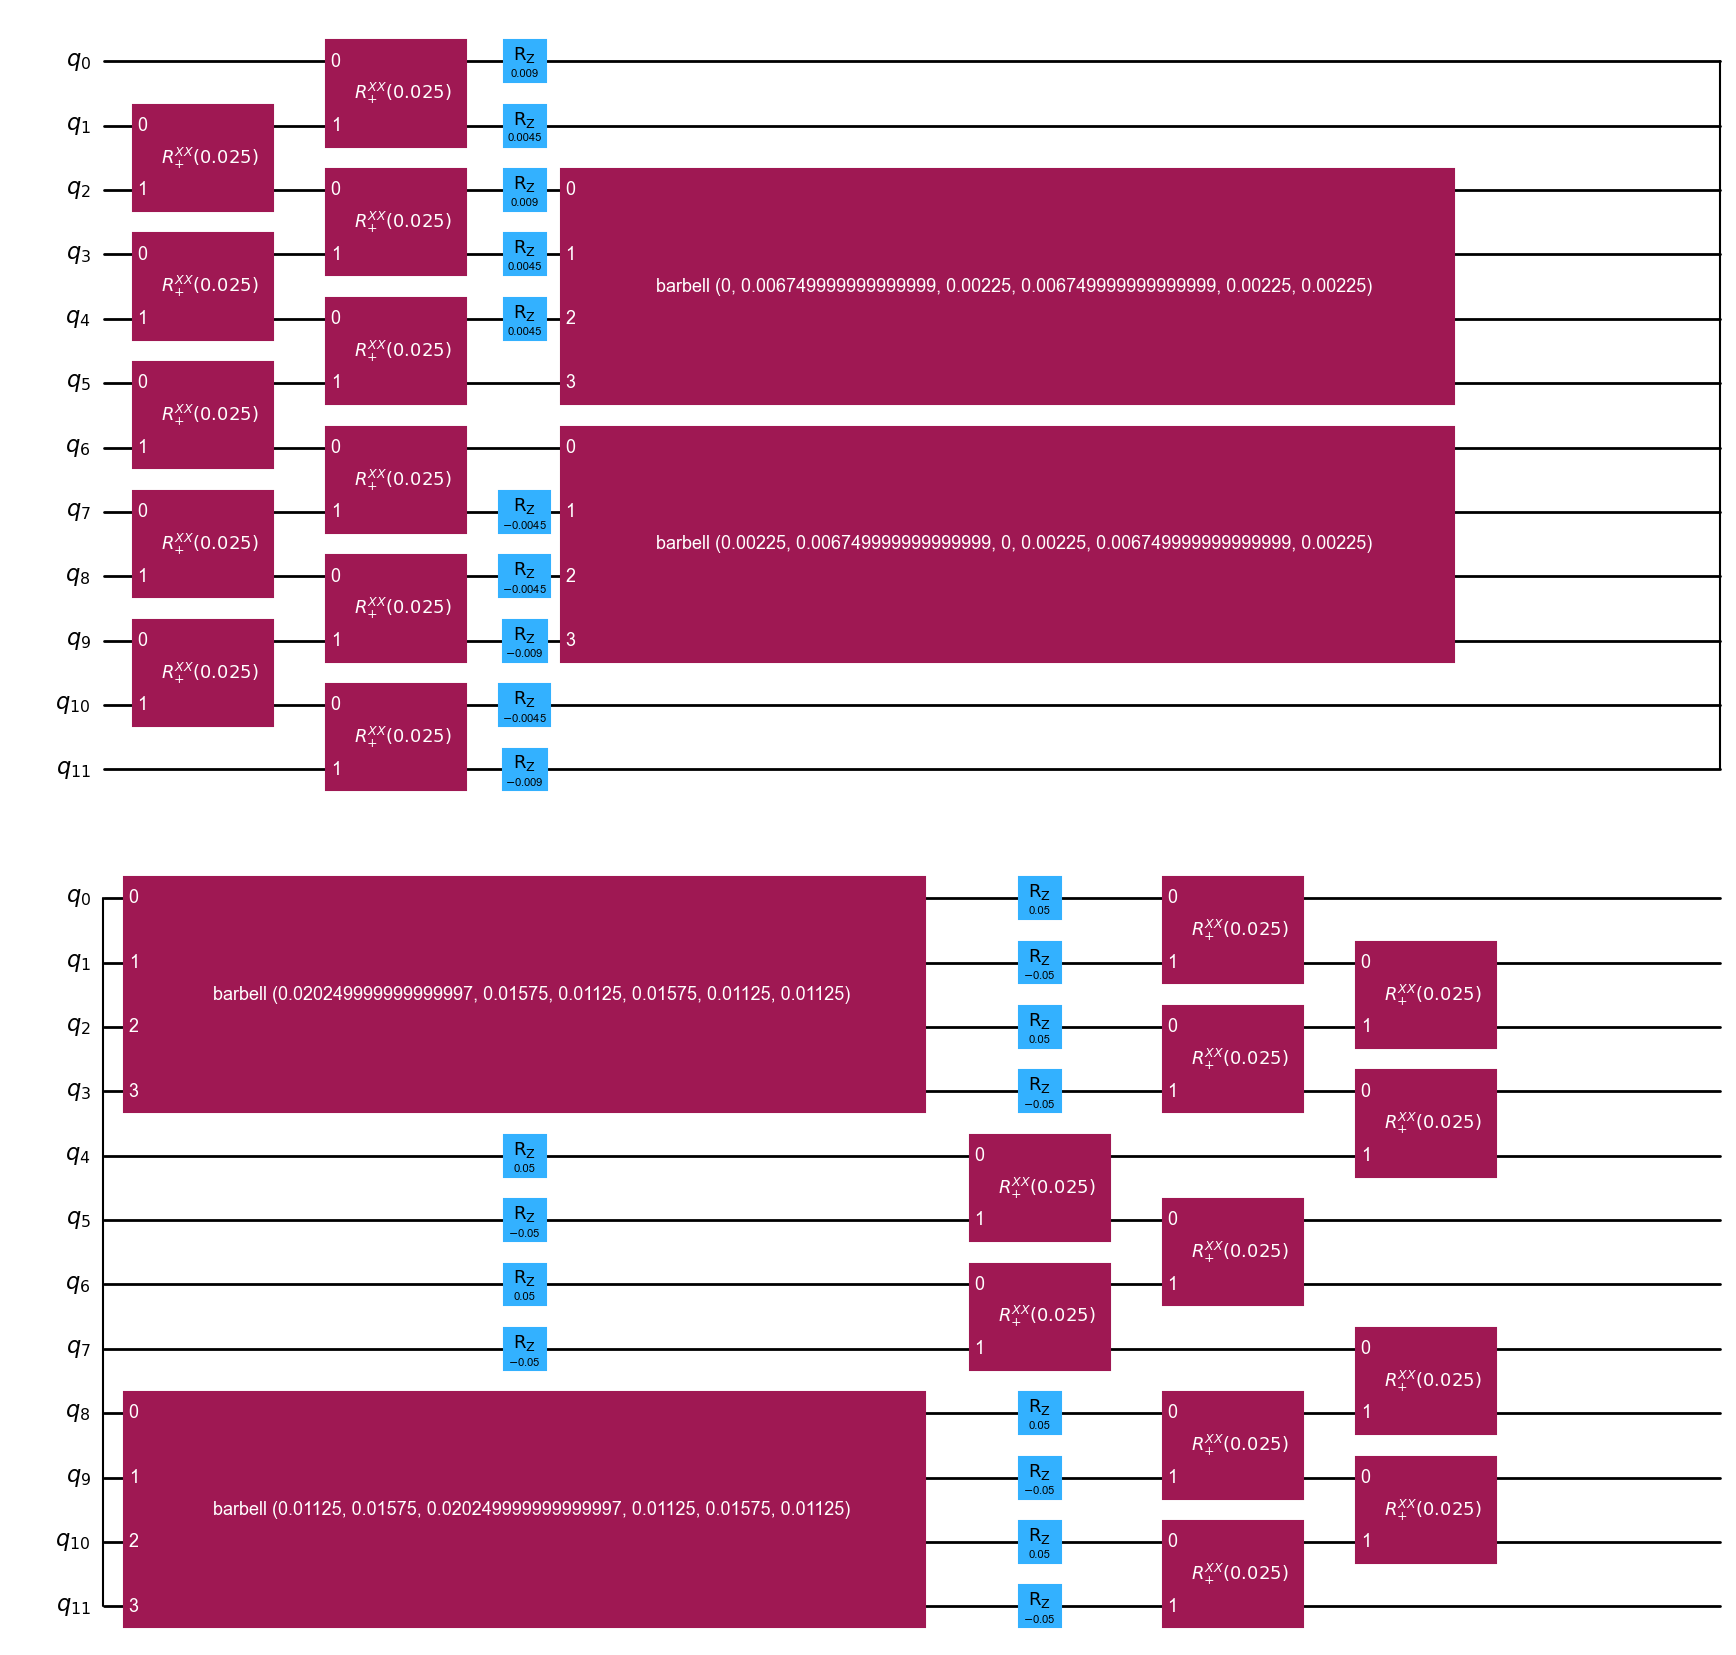

In [74]:
# code cell for circuit visualization
test_L = 6
circuit = QuantumCircuit(2 * test_L)
circuit = trotter_step(circuit, test_L, 0.1, 0.5, 0.3)
display(circuit.draw('mpl'))

Now we can build circuits that evolve the wave and vacuum states to the times of interest. We will also create calibration (or mitigation) circuits that go through the same Trotter evolution for the first half of the Trotter steps and then evolve backward in time for the second half.

We will simulate only one snapshot at $t=8$.

For a given snapshot in time, we make sure the number of Trotter steps is even (this is already implemented below). Then, for the mitigation circuit, we evolve it forward in time for the first half of the steps, and backward for the second half. 

> :bulb: **OPTIONAL:** Can you implement the mitigation circuit in such a way that the transpiler will not cancel the final kinetic term of the last positive time steps with the first kinetic term of the first negative time step?

In [75]:
def evolve_circuits(qc_init: QuantumCircuit, L: int, t: float, m: float, g: float) -> QuantumCircuit:
    """
    Evolves an input circuit over time interval t using Trotterization and generates a corresponding mitigation/calibration circuit

    Args:
        qc_init: input circuit preparing an intitial state
        L: number of spatial sites
        t: total evolution time
        m: mass
        g: coupling constant
    
    Returns:
        qc: circuit preparing the evolved state (the "pysics" circuit)
        qc_mitig: corresponding mitigatin circuit that evolves forward for the first n_steps/2 steps, and backward for the next n_steps/2 steps
    """

    n_steps = int(2 * np.ceil(t/2))
    time_step = t/n_steps

    qc = qc_init.copy()
    qc_mitig = qc_init.copy()

    # PROMPT: Fill in the mising code. We want qc and qc_mitig to be the wavepacket physics and mitigation circuits evolved to time t

    # BEGIN ANSWER
    for step in range(n_steps):
        qc = trotter_step(qc, L, time_step, m, g)
        if step < n_steps // 2:
            qc_mitig = trotter_step(qc_mitig, L, time_step, m, g)
        else:
            qc_mitig = trotter_step(qc_mitig, L, -time_step, m, g)

    # END ANSWER

    return qc, qc_mitig

In [76]:
# Simulate up to t = 8:
t = 8
qc_wave, qc_wave_mitig = evolve_circuits(qc_wave_init, L, t, m, g)
qc_vacuum, qc_vacuum_mitig = evolve_circuits(qc_vacuum_init, L, t, m, g)

In [77]:
# Grade your code (the grader tests smaller-scale versions of the circuits) - this may take a while:
qc_wave_init_test = prep_wave(8, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3, wave_prep_theta_O_11, wave_prep_theta_O_22)
qc_wave_test, qc_wave_mitig_test = evolve_circuits(qc_wave_init_test, 8, t, m, g)
qc_vacuum_init_test = prep_vacuum(8, vacuum_prep_theta_OV_1, vacuum_prep_theta_OV_3)
qc_vacuum_test, qc_vacuum_mitig_test = evolve_circuits(qc_vacuum_init_test, 8, t, m, g)

In [78]:
grader_ch3_ex4(qc_wave_test, qc_wave_mitig_test, qc_vacuum_test, qc_vacuum_mitig_test)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 15.0.


### 1f: Validation: View simulated results [no prompts]
We have already calculated approximate classical solutions using Qiskit Aer's MPS simulations. Here you will just load the results and visualize them. We will later use these results to compare to the results you obtained on quantum hardware.

Remember, we hope to accurately reproduce the spreading out of the wavepacket at $t=8$, and specifically the fact that there is a dip in the vacuum-subtracted chiral condensate in the center, with a peak on each side.

In [79]:
chi_wave_evolved_sim = np.loadtxt('chi_wave_evolved_sim_L34_maxbond40.txt')
chi_vacuum_evolved_sim = np.loadtxt('chi_vacuum_evolved_sim_L34_maxbond40.txt')

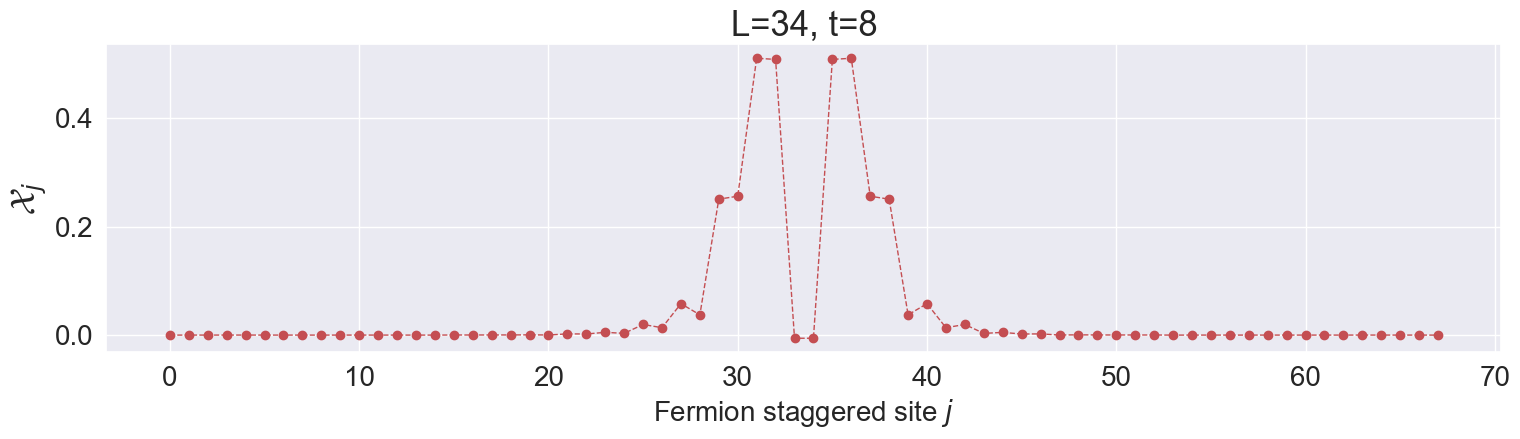

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(range(2 * L), chi_wave_evolved_sim - chi_vacuum_evolved_sim, "r--o", linewidth=1)
ax.set_ylabel(r'${\mathcal{X}}_j$', fontsize=25)
ax.set_xlabel(r'Fermion staggered site $j$');
ax.set_title(f'L={L}, t=8', fontsize=25);

## Step 2: Optimize the problem for quantum execution

<div class="alert alert-block alert-success">

In this section, you will map the four circuits and the observables to a specific IBM Quantum backend.

For error mitigation purposes, we want each circuit to be executed with hardware noise that is as similar as possible between circuits. Therefore, we will transpile each circuit to the same layout.

</div>

### 2a: Load a backend

**NOTE:** assuming you followed the setup instructions, to load the correct service credentials for this challenge below, use **`name='r2p-2025'`** when instantiating a service object below.

In [ ]:
# PROMPT: Authenticate yourself to the Qiskit Runtime service and then load a backend.
# Before choosing a backend, have a look at the backend properties here: https://quantum.cloud.ibm.com/computers.
# We used ibm_kingston for the reference experiment
# and recommend using a Heron R2/R3 device (backends with 156 qubits)
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="r2p-2025")
# BEGIN ANSWER


backend_name = # the name of the backend (text string)
backend = # this will be of type IBMBackend

# END ANSWER

In [ ]:
# Grade your answer:
grader_ch3_ex5(backend)

In [ ]:
import challenge_utils
qubit_coordinates = challenge_utils.get_qubit_coordinates(backend) # Do not modify.  This will be used for visualization purposes

### 2b: Pick a layout by transpiling the t=8 wavepacket physics circuit, then visualize the layout

We will first transpile the single t=8 wavepacket physics circuit to get a reference layout:

In [ ]:
qc = qc_wave.copy()

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend, seed_transpiler=42)
qc_isa = pm.run(qc) # transpiled circuit, of type QuantumCircuit

In [ ]:
# Get layout properties
qc_isa_init_layout = qc_isa.layout.initial_index_layout(filter_ancillas=True)
final_layout = qc_isa.layout.final_index_layout()
print(qc_isa_init_layout)

> **Note:** If you don't have installed the Graphivz library, you can skip the next cell

In [ ]:
# Visualize the layout on the full lattice
challenge_utils.plot_qubit_chain(qc_isa_init_layout, backend, qubit_coordinates)

In [ ]:
print(f"2q depth = {qc_isa.depth(lambda i: (not getattr(i.operation, '_directive', False)) and len(i.qubits) > 1)}")

> **Note:** You should have obtained a 2q depth of (close to) 220 here (for the t=8 wavepacket physics circuit) and the transpiler should have mapped the circuit to a continuous chain of qubits.

### 2c: Transpile all circuits to that layout

Create one interleaved list of all the circuits we want to run:

In [ ]:
circuits_all = [qc_wave, qc_wave_mitig, qc_vacuum, qc_vacuum_mitig]

Transpile all circuits to the same qubits:

In [ ]:
# Transpile all circuits in circuits_all to the initial layout of the reference transpiled circuit from Section 2a, qc_isa_init_layout

pm = generate_preset_pass_manager(optimization_level=3, backend=backend, seed_transpiler=42, initial_layout=qc_isa_init_layout, layout_method="trivial")
circuits_all_isa = pm.run(circuits_all) # list of transpiled circuits (in same order as original circuits_all)

In [ ]:
# Sanity check: Confirm that the initial and final layouts are identical to the reference layout we started with
assert all([ qc.layout.initial_index_layout(filter_ancillas=True) == qc_isa_init_layout for qc in circuits_all_isa])
assert all([ qc.layout.final_index_layout() == final_layout for qc in circuits_all_isa])

In [ ]:
# 2q depth for each circuit:
[qc.depth(lambda i: (not getattr(i.operation, "_directive", False)) and len(i.qubits) > 1) for qc in circuits_all_isa] # 2q depth

In [ ]:
# Transpile the list of observables to the same layout (use the layout of our reference transpiled circuit from Section 2a, qc_isa.layout)

observables_isa = [obs.apply_layout(qc_isa.layout) for obs in observables]

# Step 3: Execute by using Qiskit primitives
<div class="alert alert-block alert-success">

In this section, you will use the Qiskit Runtime Estimator primitive to run the four circuits and estimate the chiral condensate expectation values.

You will submit all four circuits (each with a list of 2L obervables) using a single call to the primitive. *Before submitting the job, make sure to read the orange text box and implement any extensions you like (see the green ["Challenge Instructions"](#instructions) box near the top of the notebook).*

</div>

In [ ]:
# PROMPT: Create an EstimatorV2 instance called estimator and set the desired options.
# Make sure to use gate and measurement twirling.
# The reference experiment used 480 twirling randomizations and 400 shots per twirl.
# You can experiment with these numbers, but be mindful of the amount of QPU time needed,
# which is strongly dependent on the total shot count (the product of the two numbers above)
# The reference run took ~6 minutes on ibm_kingston
# We also recommend using dynamical decoupling

from qiskit_ibm_runtime import EstimatorV2 as Estimator
# BEGIN ANSWER
estimator = 
# You can add now twirling randomizations and dynamical decoupling options

# END ANSWER


estimator.options.max_execution_time = 600

<div class="alert alert-block alert-warning"> 
⚠️ <strong>Caution:</strong> Make sure to keep the `estimator.options.max_execution_time = 600` parameter (see above) set to a maximum of 600 seconds (10 minutes). Do not remove this.
</div>

In [ ]:
display(estimator.options)

In [ ]:
# grade your answer:
grader_ch3_ex6(estimator)

Create list of four primitive unified blocs (PUBs) that combine the transpiled circuits with the list of transpiled observables. This will be the input to the Estimator.

In [ ]:
# PROMPT: Create a list called "pubs" where each element is a 2-tuple and the tuple contains (1) a transpiled circuit and (2) the list of obervables mapped to the correct layout.
# Use the same circuit order as in the circuits_all_isa list.

pubs =

In [ ]:
# Grade your answer:
grader_ch3_ex7(pubs, circuits_all_isa, observables_isa)

<div class="alert alert-block alert-warning"> 
⚠️ <strong>Please read:</strong>  If you have correctly completed the code up to this point, you are now, in principle, ready to run the calculation on hardware. Before submitting the job, please do two things:

1. Double-check your work.
2. Consider implementing a modification/improvement to the basic setup so far implemented. See task 2 in the green ["Challenge Instructions"](#instructions) box near the top of the notebook.
</div>

**If you have read the above box and are now TRULY ready to run on hardware, go ahead and run the Estimator job:**

In [ ]:
# PROMPT: Run the Estimator job with the list of transpiled circuits as input

job = # the job object

In [ ]:
# Print the job ID in case we want to retrieve the job in the future
print(job.job_id())

In [ ]:
# Check the job's status. Once it is running, it should take about 6 minutes to finish and reach the status DONE.
job.status()

<div class="alert alert-block alert-info">

### **Save your job ID and then use the grader to check your score.**

</div>

In [ ]:
with open('submitted-results/job_id.txt', 'w') as file:
    file.write(job.job_id())

In [ ]:
# grade your answer once the job has finished (status = 'DONE'):
grader_ch3_ex8(job)

# Step 4: Post-process and analyze results

<div class="alert alert-block alert-success">
    
In this section, you will retrieve the Estimator results, apply error mitigation, and finally visualize the vacuum-subtracted chiral condensate.

Post-processing/error mitigation techniques implemented below include:
* Operator decoherence renormalization (ODR) (plus minimal post-selection): We estimate a decoherence suppression factor for each expectation value $\langle Z_j \rangle$ by dividing $\langle Z_j \rangle$ measured from the mitigation circuit by its known exact value. We then correct $Z_j$ for the physics circuit, assuming the same suppression factor. This processing is pre-implemented in the `challenge_utils` module. Some additional notes on ODR:
  * ODR assumes that the global noise channel can be modeled as Pauli-noise. This is why it is essential to apply Pauli-Twirling before using ODR. However, this still does not guarantee that the global noise model truly has a diagonal Pauli Transfer Matrix (PTM).
  * ODR assumes that the global noise model for the mitigation circuits is identical to that of the physics circuits. The approach of forward/backward Trotter evolution implemented above for the mitigation circuits is expected to lead to similar noise models between the physics and mitigation circuits, but does not guarantee them to be identical.
  * Despite the above caveats, in practice, ODR is a quite effective error mitigation technique with modest overhead.
  * However, because of points (1) and (2), ODR is biased and does not provide control and understanding of its error bars. As we push toward quantum advantage applications, we therefore should use techniques that are unbiased and/or provide rigorous error bars.
* Symmetrization of the results: This uses the CP-symmetry of the model, which for the chiral condensate on the lattice is manifested as a simple mirror symmetry. For each site/qubit $j$, we will take the average of the estimated $\hat{\chi}_j$ and $\hat{\chi}_{2L - 1 - j}$.
* Vacuum-subtraction: By subtracting the chiral condensate of the evolved vacuum from the evolved wavepacket condensate, errors that impact the two cases in the same way cancel out.

*Note that most of the post-processing and visualization has already been implemented below, but there is one post-processing prompt.*

</div>

### 4a: Retrieve results

When the job status is 'DONE' load the results into a variable called `results`. The data type of `results` should be `qiskit.primitives.containers.primitive_result.PrimitiveResult`.

In [ ]:
# PROMPT: Retrieve the results (see text above)



Get results in the form of arrays of expectation values:

In [ ]:
# PROMPT: Unpack the results by creating four arrays with the chiral condensate expectation values vs. the lattice site for each circuit,
# as obtained from the Estimator results.

chi_wave =
chi_wave_mitig =
chi_vacuum =
chi_vacuum_mitig =

In [ ]:
# Grade your result
grader_ch3_ex9(chi_wave, chi_wave_mitig, chi_vacuum, chi_vacuum_mitig, results)

### 4b: Post-process results

For the post-selection and ODR error mitigation parts of the post-processing, we will use a pre-written function in the `challenge_utils` module (already called inside the postprocess_chi function below), but as part of task 2 (see the green ["Challenge Instructions"](#instructions) box near the top of the notebook), you may want to experiment with modifications/improvements to this code.

In [ ]:
def postprocess_chi(chi: np.ndarray, chi_cal: np.ndarray, chi_exact: np.ndarray, L: int, suppression_threshold: float = 0.01) -> tuple[np.ndarray,np.ndarray,np.ndarray]:
    """
    Takes chiral condensate (chi) expectation value array for the physics and mitigation circuits
    and returns 2 numpy arrays of shape (2L) containing
    the CP-symmetrized error-mitigated chiral condensate and the CP-symmetrized raw chiral condensate
    

    Args:
        chi: numpy array containing the chiral condensate expectation values for a physics circuit
        chi_cal: numpy array containing the chiral condensate expectation values for the corresponding mitigation/calibration circuit
        chi_exact: single array with the simulated chiral condensate for the mitigation/calibration circuit
        L: number of spatial sites
        suppression_threshold: threshold for post-selection. If for a given qubit at a given time,
        the ratio of the measured <Z> over the simulated <Z> for the mitigation/calibration circuit is below this threshold, then the sample is discarded
    
    Returns:
        the CP-symmetrized error-mitigated chiral condensate and the CP-symmetrized raw chiral condensate
    """

    chi_mitigated_symmetrized = challenge_utils.postselection_and_mitigation(chi, chi_cal, chi_exact, L,
                                                                             suppression_threshold=suppression_threshold)

    # PROMPT: Fill in the CP-averaged chi array at time index `it` (hint: CP symmetry in the theory corresponds to mirror symmetry on the qubits)
    # BEGIN ANSWER
    chi_unmitigated_symmetrized =
    # END ANSWER

    return chi_mitigated_symmetrized, chi_unmitigated_symmetrized

# Apply post-processing:
chi_wave_mitigated_symmetrized, chi_wave_symmetrized  = postprocess_chi(chi_wave, chi_wave_mitig, chi_wave_exact, L, suppression_threshold=0.01)
chi_vacuum_mitigated_symmetrized, chi_vacuum_symmetrized  = postprocess_chi(chi_vacuum, chi_vacuum_mitig, chi_vacuum_exact, L, suppression_threshold=0.01)

In [ ]:
# grade your result
grader_ch3_ex10(chi_wave_symmetrized, chi_wave, chi_vacuum_symmetrized, chi_vacuum)

### 4c: Visualize results [no prompts]

First show the estimated signal suppression in the $\langle Z \rangle$ expectation values due to hardware noise.

Are all qubits impacted equally by hardware noise?

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
it = 0
plt.errorbar(range(2*L), (1 - chi_vacuum_mitig)/(1 - chi_vacuum_exact),
             capsize=5, fmt="r--o", label='Vacuum', elinewidth=1, linewidth=1);
plt.errorbar(range(2*L), (1 - chi_wave_mitig)/(1 - chi_wave_exact),
             capsize=5, fmt="k--o", label='Wavepacket', elinewidth=1, linewidth=1);

ax.set_ylabel(r'Calibration factor')
ax.set_xlabel(r'Fermion staggered site $j$');
ax.legend();

Plot the vacuum-subtracted wavepacket chiral condensate at $t=8$, both with and without error mitigation.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
it = 0
ax.plot(range(2*L), chi_wave_evolved_sim - chi_vacuum_evolved_sim, "g-o", linewidth=2, label='MPS Simulation')
plt.errorbar(range(2*L), chi_wave_symmetrized - chi_vacuum_symmetrized,
             capsize=5, fmt="r--o", label='Hardware', elinewidth=1, linewidth=1);
plt.errorbar(range(2*L), chi_wave_mitigated_symmetrized - chi_vacuum_mitigated_symmetrized,
             capsize=5, fmt="k--o", label='Mitigated', elinewidth=1, linewidth=1);

ax.set_ylabel(r'$\mathcal{X}_j$')
ax.set_xlabel(r'Fermion staggered site $j$');
ax.set_title('Wave: vacuum-subtracted', fontsize=20);
ax.legend(loc='upper left');

<div class="alert alert-block alert-info">

### Save your chiral condensate results and then use the grader to check your score.

</div>

In [ ]:
np.savez('submitted-results/chi_arrays.npz', chi_wave_mitigated_symmetrized, chi_vacuum_mitigated_symmetrized,
                           chi_wave, chi_wave_mitig, chi_vacuum, chi_vacuum_mitig)

In [ ]:
# grade your result
grader_ch3_ex11(chi_wave_mitigated_symmetrized - chi_vacuum_mitigated_symmetrized)